In [41]:
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from collections import Counter
import numpy as np

In [3]:
#df = pd.read_csv("/shared/3/projects/benlitterer/podcastData/processed/mergedMetaDataClean.csv", quoting=csv.QUOTE_NONNUMERIC)

In [4]:
#tempDf = pd.read_csv("/shared/3/projects/benlitterer/podcastData/processed/mergedMetaDataClean.csv", quoting=csv.QUOTE_NONNUMERIC, nrows=300)

In [5]:
#df.columns

In [6]:
#loadedDf = df
#df.shape 

In [7]:
#df["cleanDatesLoc"] = pd.to_datetime(df["cleanDatesLoc"])

In [8]:
#we want only times in May, June 2020 
#df = df[(df["cleanDatesLoc"] >= "2020-5-1") & (df["cleanDatesLoc"] <= "2020-6-30")]

In [9]:
#write the data 
#df.to_json("/shared/3/projects/benlitterer/podcastData/processed/mayJune/mayJuneMetadata.jsonl", orient="records", lines=True)

In [2]:
df = pd.read_json("/shared/3/projects/benlitterer/podcastData/processed/mayJune/mayJuneMetadata.jsonl", orient="records", lines=True)

In [47]:
inDf = df

In [44]:
cleanedData = pd.read_feather("/shared/3/projects/benlitterer/podcastData/processed/mayJune/mayJuneDataRoles.feather")

In [48]:
#get only the rows from df that are in cleanedData!
cleanedKeys = list(cleanedData["potentialOutPath"])
df = df.set_index("potentialOutPath").loc[cleanedKeys].reset_index()

In [8]:
print(len(df["rssUrl"].unique()))
print(len(df))

273650
1643516


In [9]:
transcriptData = pd.read_json("/shared/3/projects/benlitterer/podcastData/processed/mayJune/mayJuneMetaTranscripts.jsonl", orient="records", lines=True)

In [50]:
cleanedKeys = list(cleanedData["potentialOutPath"])
transcriptData = transcriptData.set_index("potentialOutPath").loc[cleanedKeys].reset_index()

In [51]:
print(len(transcriptData["rssUrl"].unique()))

228099


In [52]:
transcriptData.shape

(1149699, 59)

In [53]:
df = transcriptData

In [54]:
df["cleanDatesLoc"] = pd.to_datetime(df["cleanDatesLoc"], unit="ms")

In [55]:
#days of the week? 
#just get the day of each published podcast 
df["dayOfWeek"] = df["cleanDatesLoc"].dt.dayofweek

In [56]:
#df = pd.read_json("/shared/3/projects/benlitterer/podcastData/processed/mayJune/mayJuneMetadata.jsonl", orient="records", lines=True)

In [57]:
#just get category counts
"""
for i, row in tqdm(df.iterrows(), total=df.shape[0]): 
    if i % 1000 == 0: 
        print(i)
"""
catList = []
for i in range(1, 11): 
    catList += list(df[f"category{i}"])

In [58]:
catDf = pd.DataFrame(catList, columns=["category"])
catDf.columns

Index(['category'], dtype='object')

In [59]:
countDf = pd.DataFrame(catDf["category"].value_counts()).reset_index()

In [60]:
#the old way took into account all categories, for this, let's just do category1
countDf = pd.DataFrame(df["category1"].value_counts()).reset_index()

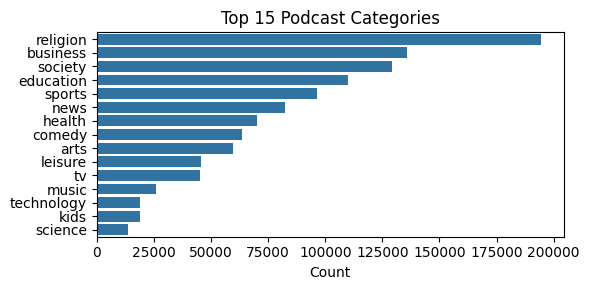

In [61]:
fig, ax = plt.subplots(figsize=(6, 3))
#sns.kdeplot(data=epCounts[epCounts["epsPerMonth"] < 100], x="epsPerMonth", ax=ax) 
sns.barplot(data=countDf.head(15), x="count", y="category1",  ax=ax) 
plt.title("Top 15 Podcast Categories")
ax.set_xlabel("Count")
ax.set_ylabel(None)

plt.tight_layout()
plt.savefig("/home/blitt/projects/podcasts/analysis/descriptiveStatistics/plots/top15Categories.png")
plt.savefig("/home/blitt/projects/podcasts/analysis/descriptiveStatistics/plots/top15Categories.pdf")


In [62]:
#frequency of publication 
epCounts = pd.DataFrame(df["rssUrl"].value_counts()) 
epCounts["epsPerMonth"] = epCounts["count"] / 2

In [63]:
"""
fig, ax = plt.subplots(1, 2, figsize=(5, 3))

sns.histplot(data=epCounts[epCounts["epsPerMonth"] < 200], x="epsPerMonth", element="step", ax=ax, bins=list(np.arange(0, 40, .5))) 
ax.set_xlim(10, 50)
ax.set_ylim(0, 1000)
plt.title("Podcast Episode Release Frequency")
ax.set_xlabel("Episodes Per Month")
#plt.savefig("/home/blitt/projects/podcasts/analysis/descriptiveStatistics/plots/releaseFrequencyDist.png")

sns.histplot(data=epCounts[epCounts["epsPerMonth"] < 200], x="epsPerMonth", element="step", ax=ax, bins=list(np.arange(0, 40, .5))) 
ax.set_xlim(10, 50)
ax.set_ylim(0, 1000)
plt.title("Podcast Episode Release Frequency")
ax.set_xlabel("Episodes Per Month")
"""

'\nfig, ax = plt.subplots(1, 2, figsize=(5, 3))\n\nsns.histplot(data=epCounts[epCounts["epsPerMonth"] < 200], x="epsPerMonth", element="step", ax=ax, bins=list(np.arange(0, 40, .5))) \nax.set_xlim(10, 50)\nax.set_ylim(0, 1000)\nplt.title("Podcast Episode Release Frequency")\nax.set_xlabel("Episodes Per Month")\n#plt.savefig("/home/blitt/projects/podcasts/analysis/descriptiveStatistics/plots/releaseFrequencyDist.png")\n\nsns.histplot(data=epCounts[epCounts["epsPerMonth"] < 200], x="epsPerMonth", element="step", ax=ax, bins=list(np.arange(0, 40, .5))) \nax.set_xlim(10, 50)\nax.set_ylim(0, 1000)\nplt.title("Podcast Episode Release Frequency")\nax.set_xlabel("Episodes Per Month")\n'

/tmp/ipykernel_701968/777430563.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(["Mon.", "Tues.", "Wed.", "Thurs.", "Fri.", "Sat.", "Sun."])


Text(0.5, 0.98, '')

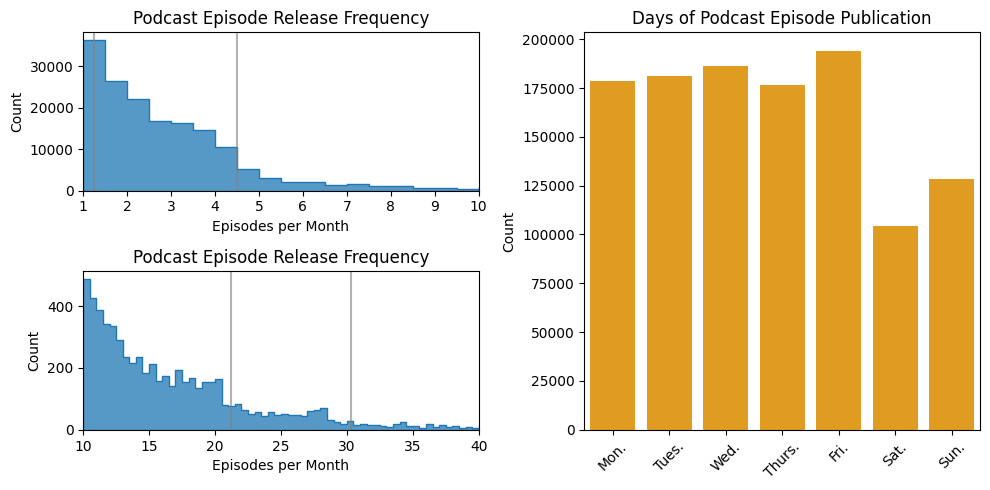

In [64]:
fig = plt.figure(figsize=(10, 5))
#fig, axs = plt.subplots(2, 1, figsize=(5, 6))

gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[:,1])

#sns.kdeplot(data=epCounts[epCounts["epsPerMonth"] < 100], x="epsPerMonth", ax=ax) 
sns.histplot(data=epCounts[epCounts["epsPerMonth"] < 200], x="epsPerMonth", element="step", ax=ax1, bins=list(np.arange(1, 11, .5))) 
ax1.set_xlim(1, 10)
ax1.axvline(4.5, color="grey", alpha=.6)
ax1.axvline(1.25, color="grey", alpha=.6)
#axs[0].axvline(4)

ax1.set_xlabel("Episodes per Month")
ax1.set_title("Podcast Episode Release Frequency")

sns.histplot(data=epCounts[epCounts["epsPerMonth"] < 200], x="epsPerMonth", element="step", ax=ax2, bins=list(np.arange(10, 41, .5))) 
ax2.set_xlim(10, 40)
ax2.axvline(21.25, color="grey", alpha=.6)
ax2.axvline(30.35, color="grey", alpha=.6)

ax2.set_xlabel("Episodes per Month")
ax2.set_title("Podcast Episode Release Frequency")



sns.countplot(data=df, x="dayOfWeek", ax=ax3, color="orange")
ax3.set_xticklabels(["Mon.", "Tues.", "Wed.", "Thurs.", "Fri.", "Sat.", "Sun."])  
ax3.set_xlabel(None)
ax3.set_ylabel("Count")
ax3.set_title("Days of Podcast Episode Publication")
ax3.tick_params(axis="x", rotation=45)
plt.tight_layout()
plt.savefig("/home/blitt/projects/podcasts/analysis/descriptiveStatistics/plots/pubBehaviorPlots.png", dpi=1000)
plt.savefig("/home/blitt/projects/podcasts/analysis/descriptiveStatistics/plots/pubBehaviorPlots.pdf")
plt.suptitle("")

In [65]:
df["rssUrl"].head() 

0    https://feeds.buzzsprout.com/783020.rss
1    https://feeds.buzzsprout.com/783020.rss
2    https://feeds.buzzsprout.com/783020.rss
3    https://feeds.buzzsprout.com/783020.rss
4    https://feeds.buzzsprout.com/783020.rss
Name: rssUrl, dtype: object

In [66]:
import sys
from urllib.parse import urlparse 
import re

def getHost(rssUrl): 
    host = urlparse(rssUrl).netloc
    #remove anything that isn't a letter, number, or . 
    #host = re.sub("[^\w\d.]","", host)

    #get the first few chars of the path 
    #path = urlparse(inPath).path
    #path = re.sub("[^\w]","", path)
    return host

In [67]:
uniquePods = df.drop_duplicates(subset=["rssUrl"])
uniquePods["host"] = uniquePods["rssUrl"].apply(getHost)

/tmp/ipykernel_701968/885303851.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uniquePods["host"] = uniquePods["rssUrl"].apply(getHost)


In [68]:
hostCounts = pd.DataFrame(uniquePods["host"].value_counts()).reset_index()

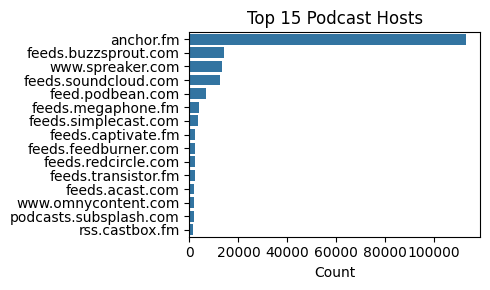

In [69]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(data=hostCounts.head(15), x="count", y="host", ax=ax)
plt.title("Top 15 Podcast Hosts")
ax.set_ylabel(None)
ax.set_xlabel("Count")
plt.tight_layout()
plt.savefig("/home/blitt/projects/podcasts/analysis/descriptiveStatistics/plots/hostDistPlots.png")
plt.savefig("/home/blitt/projects/podcasts/analysis/descriptiveStatistics/plots/hostDistPlots.pdf")

In [70]:
#podcast length? 
#for parsing the metadata durations 
def parseDurations(inDuration): 
    #if na value, just return na value 
    if inDuration != inDuration: 
        return inDuration 
    
    inDuration = str(inDuration)
    inDuration = re.sub("[A-z]", "", inDuration)
    colonCount = inDuration.count(":")
    
    try: 
        
        #parse different strings into number of seconds 
        if colonCount == 0: 
            return int(inDuration)

        elif colonCount == 1: 
            mins, seconds = [int(item) for item in inDuration.split(":")]
            return (60*mins) + seconds 

        elif colonCount == 2: 
            hours, mins, seconds = [int(item) for item in inDuration.split(":")]
            return (hours*60*60) + (mins*60) + seconds
        else: 
            return np.nan
    except: 
        return np.nan

In [71]:
import re

In [72]:
df["parsedDuration"] = df["duration"].apply(parseDurations)

In [73]:
hasDuration = df.dropna(subset=["parsedDuration"]) 
hasDuration["durationHours"] = hasDuration["parsedDuration"] / (60 * 60)

/tmp/ipykernel_701968/2740566545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hasDuration["durationHours"] = hasDuration["parsedDuration"] / (60 * 60)


In [74]:
#print(np.nanmean(hasDuration["durationHours"]))
print(np.nanmedian(hasDuration["durationHours"]))
print(np.nanmedian(hasDuration["parsedDuration"]))
print(1896/60)

0.5025
1809.0
31.6


<Axes: xlabel='durationHours', ylabel='Proportion'>

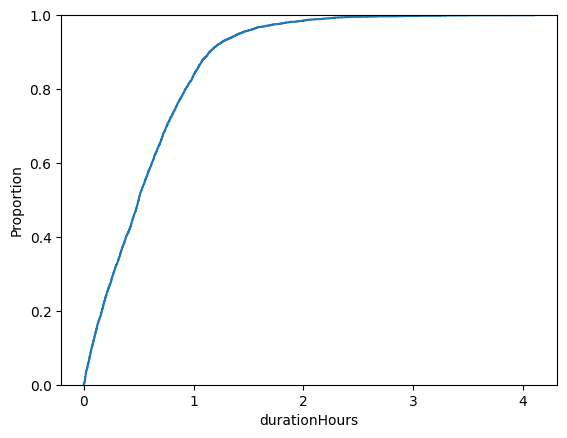

In [75]:
sns.ecdfplot(hasDuration.sample(4000), x="durationHours")

In [76]:
hostCounts.head() 

,host,count
0,anchor.fm,113138
1,feeds.buzzsprout.com,13971
2,www.spreaker.com,13178
3,feeds.soundcloud.com,12675
4,feed.podbean.com,6836


/tmp/ipykernel_701968/2846872916.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(["Mon.", "Tues.", "Wed.", "Thurs.", "Fri.", "Sat.", "Sun."])


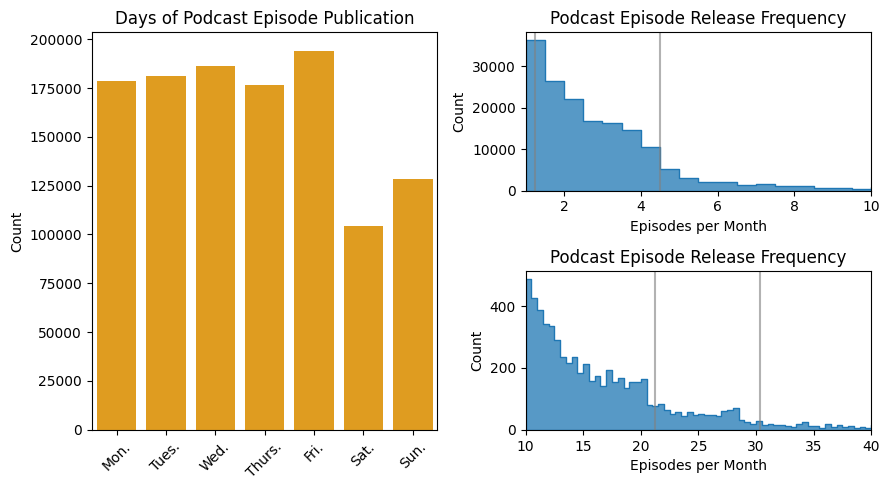

In [77]:

fig = plt.figure(figsize=(9, 5))
#fig, axs = plt.subplots(2, 1, figsize=(5, 6))

gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,1])
ax3 = fig.add_subplot(gs[0:2,0])


#sns.kdeplot(data=epCounts[epCounts["epsPerMonth"] < 100], x="epsPerMonth", ax=ax) 
sns.histplot(data=epCounts[epCounts["epsPerMonth"] < 200], x="epsPerMonth", element="step", ax=ax1, bins=list(np.arange(1, 11, .5))) 
ax1.set_xlim(1, 10)
ax1.axvline(4.5, color="grey", alpha=.6)
ax1.axvline(1.25, color="grey", alpha=.6)
#axs[0].axvline(4)

ax1.set_xlabel("Episodes per Month")
ax1.set_title("Podcast Episode Release Frequency")

sns.histplot(data=epCounts[epCounts["epsPerMonth"] < 200], x="epsPerMonth", element="step", ax=ax2, bins=list(np.arange(10, 41, .5))) 
ax2.set_xlim(10, 40)
ax2.axvline(21.25, color="grey", alpha=.6)
ax2.axvline(30.35, color="grey", alpha=.6)

ax2.set_xlabel("Episodes per Month")
ax2.set_title("Podcast Episode Release Frequency")


sns.countplot(data=df, x="dayOfWeek", ax=ax3, color="orange")
ax3.set_xticklabels(["Mon.", "Tues.", "Wed.", "Thurs.", "Fri.", "Sat.", "Sun."])  
ax3.set_xlabel(None)
ax3.set_ylabel("Count")
ax3.set_title("Days of Podcast Episode Publication")
ax3.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.savefig("/home/blitt/projects/podcasts/analysis/descriptiveStatistics/plots/pubBehaviorPlots.png", dpi=1000)
plt.savefig("/home/blitt/projects/podcasts/analysis/descriptiveStatistics/plots/pubBehaviorPlots.pdf")


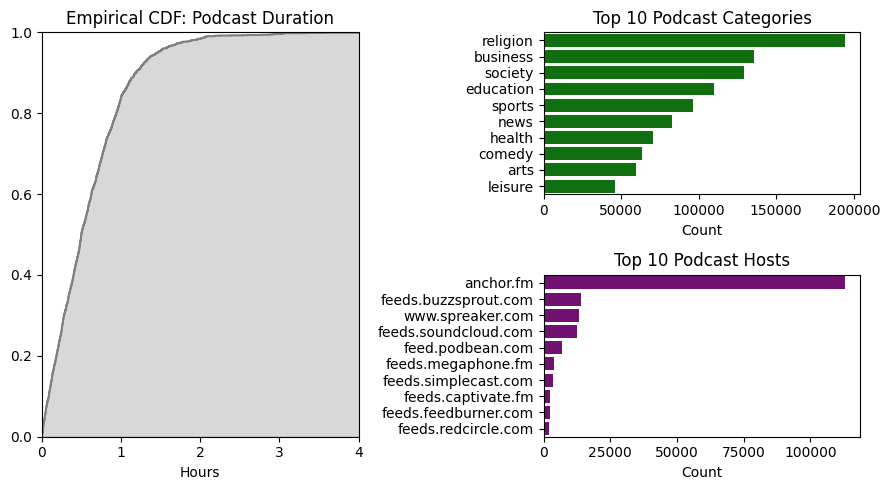

In [78]:

fig = plt.figure(figsize=(9, 5))
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,1])
ax3 = fig.add_subplot(gs[0:2,0])

#sns.kdeplot(data=epCounts[epCounts["epsPerMonth"] < 100], x="epsPerMonth", ax=ax) 
sns.barplot(data=countDf.head(10), x="count", y="category1",  ax=ax1, color="green") 
ax1.set_title("Top 10 Podcast Categories")
ax1.set_xlabel("Count")
ax1.set_ylabel(None)
ax1.locator_params(axis="x", nbins=5)

sns.barplot(data=hostCounts.head(10), x="count", y="host", ax=ax2, color="purple")
ax2.set_title("Top 10 Podcast Hosts")
ax2.set_ylabel(None)
ax2.set_xlabel("Count")
ax2.locator_params(axis="x", nbins=5)

sns.ecdfplot(hasDuration[hasDuration["durationHours"] < 20].sample(2000), x="durationHours", ax=ax3, color="grey")
ax3.set_xlabel("Hours")
ax3.set_ylabel(None)
ax3.set_title("Empirical CDF: Podcast Duration")

# Get the two lines from the axes to generate shading
l1 = ax3.lines[0]

# Get the xy data from the lines so that we can shade
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

ax3.fill_between(x1,y1, color="grey", alpha=0.3)
ax3.set_xlim(0, 4)

plt.tight_layout()
plt.savefig("/home/blitt/projects/podcasts/analysis/descriptiveStatistics/plots/durationCatHost.png", dpi=1000)
plt.savefig("/home/blitt/projects/podcasts/analysis/descriptiveStatistics/plots/durationCatHost.pdf")

In [82]:
#what is the total duration of audio? 
sum(hasDuration["durationHours"]) 

442002921.8991481

In [104]:
transcribedHours = sum(hasDuration.loc[hasDuration["durationHours"] < 3, "durationHours"]) 
print(transcribedHours)

657388.5350000532


In [105]:
#so how many compute hours with whisper 
#whisper is about 3x speed, so..
650000/3

216666.66666666666

In [106]:
#just to sanity check 
216666/(120*24)

75.23125

In [111]:
(transcribedHours/3)/(5*8*24)

228.2599079861296

In [112]:
100000/34

2941.176470588235

2941.176470588235